<a href="https://colab.research.google.com/github/Shaurya6355/Algo-Trading/blob/main/AlgoTrading_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install pandas_ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install talib-binary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import pandas_ta as ta

In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from math import floor
from termcolor import colored as cl
import talib as tb


pd.options.mode.chained_assignment = None  # default='warn'

## Stochastic Oscillator

In [6]:
tsla = yf.Ticker("TSLA")
tsla=tsla.history(period='6mo')[['Open', 'High', 'Low' ,'Close']]

In [7]:
k_period = 14
d_period = 3

In [8]:
tsla['n_high']=tsla['High'].rolling(14).max()
tsla['n_low'] = tsla['Low'].rolling(k_period).min()
tsla['%K'] = (tsla['Close'] - tsla['n_low']) * 100 / (tsla['n_high'] - tsla['n_low'])
tsla['%D'] = tsla['%K'].rolling(d_period).mean()

In [9]:
print(tsla['n_high'].head(20))

Date
2022-01-25           NaN
2022-01-26           NaN
2022-01-27           NaN
2022-01-28           NaN
2022-01-31           NaN
2022-02-01           NaN
2022-02-02           NaN
2022-02-03           NaN
2022-02-04           NaN
2022-02-07           NaN
2022-02-08           NaN
2022-02-09           NaN
2022-02-10           NaN
2022-02-11    987.690002
2022-02-14    987.690002
2022-02-15    947.770020
2022-02-16    947.770020
2022-02-17    947.770020
2022-02-18    947.770020
2022-02-22    947.770020
Name: n_high, dtype: float64


In [10]:
tsla.ta.stoch(high='high', low='low', k=14, d=3, append=True)

,STOCHk_14_3_3,STOCHd_14_3_3
Date,,
2022-02-11,NaN,NaN
2022-02-14,NaN,NaN
2022-02-15,53.758778,NaN
2022-02-16,70.292849,NaN
2022-02-17,64.834423,62.962017
...,...,...
2022-07-19,66.680994,61.545296
2022-07-20,73.064822,66.743016
2022-07-21,84.549648,74.765155


In [11]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# Avoid case-sensitive issues for accessing data.
# Optional if using pandas_ta
tsla.columns = [x.lower() for x in tsla.columns]
# Create our primary chart
# the rows/cols arguments tell plotly we want two figures
fig = make_subplots(rows=2, cols=1)  
# Create our Candlestick chart with an overlaid price line
fig.append_trace(
    go.Candlestick(
        x=tsla.index,
        open=tsla['open'],
        high=tsla['high'],
        low=tsla['low'],
        close=tsla['close'],
        increasing_line_color='#ff9900',
        decreasing_line_color='black',
        showlegend=False
    ), row=1, col=1  # <------------ upper chart
)
# price Line
fig.append_trace(
    go.Scatter(
        x=tsla.index,
        y=tsla['open'],
        line=dict(color='#ff9900', width=1),
        name='open',
    ), row=1, col=1  # <------------ upper chart
)
# Fast Signal (%k)
fig.append_trace(
    go.Scatter(
        x=tsla.index,
        y=tsla['stochk_14_3_3'],
        line=dict(color='#ff9900', width=2),
        name='fast',
    ), row=2, col=1  #  <------------ lower chart
)
# Slow signal (%d)
fig.append_trace(
    go.Scatter(
        x=tsla.index,
        y=tsla['stochd_14_3_3'],
        line=dict(color='#000000', width=2),
        name='slow'
    ), row=2, col=1 # <------------ lower chart
)
# Extend our y-axis a bit
fig.update_yaxes(range=[-10, 110], row=2, col=1)
# Add upper/lower bounds
fig.add_hline(y=0, col=1, row=2, line_color="#666", line_width=2)
fig.add_hline(y=100, col=1, row=2, line_color="#666", line_width=2)
# Add overbought/oversold
fig.add_hline(y=20, col=1, row=2, line_color='#336699', line_width=2, line_dash='dash')
fig.add_hline(y=80, col=1, row=2, line_color='#336699', line_width=2, line_dash='dash')
# Make it pretty
layout = go.Layout(
    plot_bgcolor='#efefef',
    # Font Families
    font_family='Monospace',
    font_color='#000000',
    font_size=20,
    xaxis=dict(
        rangeslider=dict(
            visible=False
        )
    )
)
fig.update_layout(layout)
# View our chart in the system default HTML viewer (Chrome, Firefox, etc.)
fig.show()

## Supertrend Oscillator

In [12]:
tsla = yf.Ticker("TSLA")
tsla=tsla.history(period='6mo')[['Open', 'High', 'Low' ,'Close','Volume']]

In [13]:
tsla

,Open,High,Low,Close,Volume
Date,,,,,
2022-01-25,914.200012,951.260010,903.210022,918.400024,28865300
2022-01-26,952.429993,987.690002,906.000000,937.409973,34955800
2022-01-27,933.359985,935.390015,829.000000,829.099976,49036500
2022-01-28,831.559998,857.500000,792.010010,846.349976,44929700
2022-01-31,872.710022,937.989990,862.049988,936.719971,34812000
...,...,...,...,...,...
2022-07-19,735.000000,741.419983,710.929993,736.590027,26963400
2022-07-20,740.349976,751.989990,730.450012,742.500000,29621400
2022-07-21,765.320007,819.799988,764.599976,815.119995,47344100


In [14]:
# SUPERTREND CALCULATION
def get_supertrend(high, low, close, lookback, multiplier):
    
    # ATR
    
    tr1 = pd.DataFrame(high - low)
    tr2 = pd.DataFrame(abs(high - close.shift(1)))
    tr3 = pd.DataFrame(abs(low - close.shift(1)))
    frames = [tr1, tr2, tr3]
    tr = pd.concat(frames, axis = 1, join = 'inner').max(axis = 1)
    atr = tr.ewm(lookback).mean()
    
    # H/L AVG AND BASIC UPPER & LOWER BAND
    
    hl_avg = (high + low) / 2
    upper_band = (hl_avg + multiplier * atr).dropna()
    lower_band = (hl_avg - multiplier * atr).dropna()
    
    # FINAL UPPER BAND
    
    final_bands = pd.DataFrame(columns = ['upper', 'lower'])
    final_bands.iloc[:,0] = [x for x in upper_band - upper_band]
    final_bands.iloc[:,1] = final_bands.iloc[:,0]
    
    for i in range(len(final_bands)):
        if i == 0:
            final_bands.iloc[i,0] = 0
        else:
            if (upper_band[i] < final_bands.iloc[i-1,0]) | (close[i-1] > final_bands.iloc[i-1,0]):
                final_bands.iloc[i,0] = upper_band[i]
            else:
                final_bands.iloc[i,0] = final_bands.iloc[i-1,0]
    
    # FINAL LOWER BAND
    
    for i in range(len(final_bands)):
        if i == 0:
            final_bands.iloc[i, 1] = 0
        else:
            if (lower_band[i] > final_bands.iloc[i-1,1]) | (close[i-1] < final_bands.iloc[i-1,1]):
                final_bands.iloc[i,1] = lower_band[i]
            else:
                final_bands.iloc[i,1] = final_bands.iloc[i-1,1]
    
    # SUPERTREND
    
    supertrend = pd.DataFrame(columns = [f'supertrend_{lookback}'])
    supertrend.iloc[:,0] = [x for x in final_bands['upper'] - final_bands['upper']]
    
    for i in range(len(supertrend)):
        if i == 0:
            supertrend.iloc[i, 0] = 0
        elif supertrend.iloc[i-1, 0] == final_bands.iloc[i-1, 0] and close[i] < final_bands.iloc[i, 0]:
            supertrend.iloc[i, 0] = final_bands.iloc[i, 0]
        elif supertrend.iloc[i-1, 0] == final_bands.iloc[i-1, 0] and close[i] > final_bands.iloc[i, 0]:
            supertrend.iloc[i, 0] = final_bands.iloc[i, 1]
        elif supertrend.iloc[i-1, 0] == final_bands.iloc[i-1, 1] and close[i] > final_bands.iloc[i, 1]:
            supertrend.iloc[i, 0] = final_bands.iloc[i, 1]
        elif supertrend.iloc[i-1, 0] == final_bands.iloc[i-1, 1] and close[i] < final_bands.iloc[i, 1]:
            supertrend.iloc[i, 0] = final_bands.iloc[i, 0]
    
    supertrend = supertrend.set_index(upper_band.index)
    supertrend = supertrend.dropna()[1:]
    
    # ST UPTREND/DOWNTREND
    
    upt = []
    dt = []
    close = close.iloc[len(close) - len(supertrend):]

    for i in range(len(supertrend)):
        if close[i] > supertrend.iloc[i, 0]:
            upt.append(supertrend.iloc[i, 0])
            dt.append(np.nan)
        elif close[i] < supertrend.iloc[i, 0]:
            upt.append(np.nan)
            dt.append(supertrend.iloc[i, 0])
        else:
            upt.append(np.nan)
            dt.append(np.nan)
            
    st, upt, dt = pd.Series(supertrend.iloc[:, 0]), pd.Series(upt), pd.Series(dt)
    upt.index, dt.index = supertrend.index, supertrend.index
    
    return st, upt, dt

tsla['st'], tsla['s_upt'], tsla['st_dt'] = get_supertrend(tsla['High'], tsla['Low'], tsla['Close'], 10, 3)
tsla = tsla[1:]
print(tsla.head())

                  Open        High         Low       Close    Volume  \
Date                                                                   
2022-01-26  952.429993  987.690002  906.000000  937.409973  34955800   
2022-01-27  933.359985  935.390015  829.000000  829.099976  49036500   
2022-01-28  831.559998  857.500000  792.010010  846.349976  44929700   
2022-01-31  872.710022  937.989990  862.049988  936.719971  34812000   
2022-02-01  935.210022  943.700012  905.000000  931.250000  24379400   

                     st  s_upt        st_dt  
Date                                         
2022-01-26  1143.857845    NaN  1143.857845  
2022-01-27  1126.078746    NaN  1126.078746  
2022-01-28  1055.040871    NaN  1055.040871  
2022-01-31  1055.040871    NaN  1055.040871  
2022-02-01  1055.040871    NaN  1055.040871  


## Moving Average

In [15]:
stock=yf.Ticker("AAPL")
stock

yfinance.Ticker object <AAPL>

In [16]:
stockdata=stock.history(period='2y')
type(stockdata)

pandas.core.frame.DataFrame

In [17]:
stockdata.drop(["Volume","Dividends","Stock Splits"],inplace=True,axis=1)

In [18]:
stockdata

,Open,High,Low,Close
Date,,,,
2020-07-27,92.554013,93.734271,92.326854,93.640442
2020-07-28,93.203401,93.383652,92.097214,92.102158
2020-07-29,92.593527,94.055273,92.556491,93.867615
2020-07-30,93.025626,95.109598,92.610808,95.003426
2020-07-31,101.615844,105.102298,99.581251,104.949211
...,...,...,...,...
2022-07-19,147.919998,151.229996,146.910004,151.000000
2022-07-20,151.119995,153.720001,150.369995,153.039993
2022-07-21,154.500000,155.570007,151.940002,155.350006


In [19]:
stockdata["50MA"]=stockdata[["Close"]].rolling(50).mean()
stockdata["100MA"]=stockdata[["Close"]].rolling(100).mean()
stockdata

,Open,High,Low,Close,50MA,100MA
Date,,,,,,
2020-07-27,92.554013,93.734271,92.326854,93.640442,NaN,NaN
2020-07-28,93.203401,93.383652,92.097214,92.102158,NaN,NaN
2020-07-29,92.593527,94.055273,92.556491,93.867615,NaN,NaN
2020-07-30,93.025626,95.109598,92.610808,95.003426,NaN,NaN
2020-07-31,101.615844,105.102298,99.581251,104.949211,NaN,NaN
...,...,...,...,...,...,...
2022-07-19,147.919998,151.229996,146.910004,151.000000,143.246201,154.216749
2022-07-20,151.119995,153.720001,150.369995,153.039993,143.161400,154.122136
2022-07-21,154.500000,155.570007,151.940002,155.350006,143.227201,154.029554


In [20]:
stockdata.dropna(inplace=True)

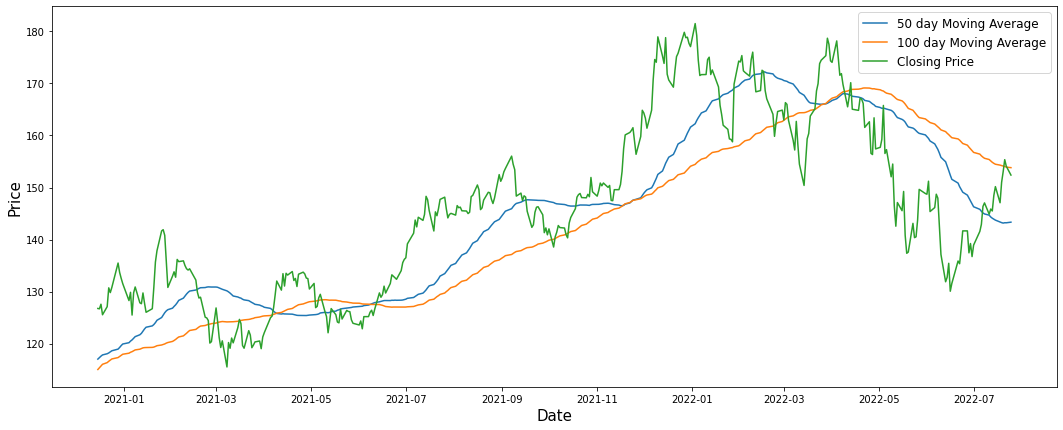

In [21]:
plt.figure(figsize=(18,7))

plt.plot(stockdata["50MA"], label="50 day Moving Average")
plt.plot(stockdata["100MA"], label="100 day Moving Average")
plt.plot(stockdata["Close"], label="Closing Price")

plt.xlabel("Date",fontsize=15)
plt.ylabel("Price",fontsize=15)

plt.legend(loc='upper right',fontsize= 'large')

## Morning Star &  Three white soldiers candlesticks pattern 

In [22]:
data=yf.Ticker("AAPL")
data=data.history(period='2y')

In [23]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-07-27,92.554020,93.734279,92.326862,93.640450,121214000,0.0,0.0
2020-07-28,93.203416,93.383668,92.097230,92.102173,103625600,0.0,0.0
2020-07-29,92.593527,94.055273,92.556491,93.867615,90329200,0.0,0.0
2020-07-30,93.025626,95.109598,92.610808,95.003426,158130000,0.0,0.0
2020-07-31,101.615851,105.102306,99.581258,104.949219,374336800,0.0,0.0
...,...,...,...,...,...,...,...
2022-07-19,147.919998,151.229996,146.910004,151.000000,82982400,0.0,0.0
2022-07-20,151.119995,153.720001,150.369995,153.039993,64823400,0.0,0.0
2022-07-21,154.500000,155.570007,151.940002,155.350006,65086600,0.0,0.0


In [24]:
data['Morning_Star'] = tb.CDLMORNINGSTAR(data['Open'], data['High'], data['Low'], data['Close'])

data['Evening_Star'] = tb.CDLEVENINGSTAR(data['Open'], data['High'], data['Low'], data['Close'])

data['Three white soldiers']=tb.CDL3WHITESOLDIERS(data['Open'], data['High'], data['Low'], data['Close'])

In [25]:
morningDays=data[data['Morning_Star']!=0]
print(morningDays)

                  Open        High         Low       Close     Volume  \
Date                                                                    
2020-11-11  116.153109  118.571515  115.409745  118.432755  112295000   
2021-03-22  119.443555  122.957478  119.374071  122.481010  111912300   
2021-10-14  141.514407  143.276993  140.916916  143.157486   69907100   
2021-12-15  174.630611  179.008592  171.838274  178.809143  131063300   
2022-04-04  174.313890  178.228137  174.184076  178.178207   76468400   
2022-04-19  164.777906  167.573801  163.669534  167.154404   67723800   
2022-04-28  159.016359  164.278631  158.696821  163.399918  130216800   

            Dividends  Stock Splits  Morning_Star  Evening_Star  \
Date                                                              
2020-11-11        0.0           0.0           100             0   
2021-03-22        0.0           0.0           100             0   
2021-10-14        0.0           0.0           100             0   
2021-12

In [26]:
EveningDays=data[data['Evening_Star']!=0]
print(EveningDays)

                  Open        High         Low       Close     Volume  \
Date                                                                    
2020-09-23  110.441852  110.926678  105.643038  105.989349  150718700   
2020-12-09  123.428168  124.835602  119.929402  120.702499  115089200   
2021-05-10  128.674857  128.804108  126.089621  126.129395   88071200   
2022-01-13  175.298765  176.136462  171.319683  171.718597   84505800   
2022-07-18  150.740005  151.570007  146.699997  147.070007   81420900   

            Dividends  Stock Splits  Morning_Star  Evening_Star  \
Date                                                              
2020-09-23        0.0           0.0             0          -100   
2020-12-09        0.0           0.0             0          -100   
2021-05-10        0.0           0.0             0          -100   
2022-01-13        0.0           0.0             0          -100   
2022-07-18        0.0           0.0             0          -100   

            Three 

In [27]:
data.loc[(data['Morning_Star']==0),('Morning_Star')]=False
data.loc[(data['Morning_Star']!=0),('Morning_Star')]=True

data.loc[(data['Evening_Star']==0),('Evening_Star')]=False
data.loc[(data['Evening_Star']!=0),('Evening_Star')]=True

data.loc[(data['Three white soldiers']==0),('Three white soldiers')]=False
data.loc[(data['Three white soldiers']!=0),('Three white soldiers')]=True


In [28]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Morning_Star,Evening_Star,Three white soldiers
Date,,,,,,,,,,
2020-07-27,92.554020,93.734279,92.326862,93.640450,121214000,0.0,0.0,False,False,False
2020-07-28,93.203416,93.383668,92.097230,92.102173,103625600,0.0,0.0,False,False,False
2020-07-29,92.593527,94.055273,92.556491,93.867615,90329200,0.0,0.0,False,False,False
2020-07-30,93.025626,95.109598,92.610808,95.003426,158130000,0.0,0.0,False,False,False
2020-07-31,101.615851,105.102306,99.581258,104.949219,374336800,0.0,0.0,False,False,False
...,...,...,...,...,...,...,...,...,...,...
2022-07-19,147.919998,151.229996,146.910004,151.000000,82982400,0.0,0.0,False,False,False
2022-07-20,151.119995,153.720001,150.369995,153.039993,64823400,0.0,0.0,False,False,False
2022-07-21,154.500000,155.570007,151.940002,155.350006,65086600,0.0,0.0,False,False,False


In [29]:
whiteSoldierDays=data[data['Three white soldiers']==True]
print(whiteSoldierDays)


Empty DataFrame
Columns: [Open, High, Low, Close, Volume, Dividends, Stock Splits, Morning_Star, Evening_Star, Three white soldiers]
Index: []
